# 時系列データとは
日あるいは月、時・分・秒など一定の間隔で取られた一連のデータ。
時系列データでないデータを、トランザクションデータと呼ぶ。

## 時系列データの取り扱い
- 「一日のデータ」は「一日に一回しか手に入らない」。
- 2000年1月1日の気温データは1つしか存在しないが、推測統計の考え方を適用し、2000年1月1日という日が無数にあったと仮定したとき、「無数に存在する2000年1月1日の気温」が母集団となる。手元にある一つの2000年1月1日のデータから、母平均を推定する、つまり「無数に存在する2000年1月1日の気温の平均」を求めるようなことをしたい。

## データ生成過程（Data Generation Process）
時間に従って変化する確率分布の事。確率過程、あるいは単に過程とも呼ばれる。


## 自己相関
時系列データの特徴は、データに前後の関係があること。
自己相関とは、過去と未来の相関を取ったもののこと。

- 正の自己相関：昨日の気温が高ければ今日も高い
- 負の自己相関：昨日の気温が高ければ今日は低い

自己相関の情報を未来予測に利用できる。

## ホワイトノイズ
未来を予測する情報がほとんど含まれていない純粋な雑音。
「期待値0、分散が一定、自己相関が0」であることが要件。

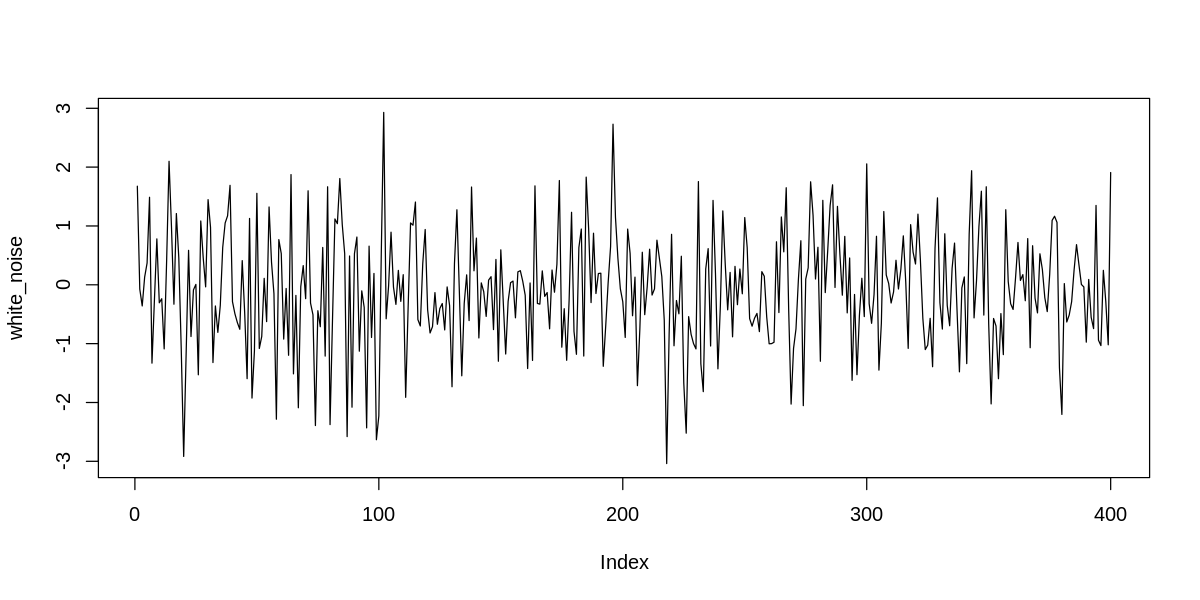

In [8]:
options(repr.plot.width=10, repr.plot.height=5)
options(warn=-1)

# ホワイトノイズの例
white_noise <- rnorm(n = 400)
plot(white_noise, type = 'l')

## コレログラム
時系列データにおいて、どのくらい離れた時期とどの程度相関があるのかをグラフにしたもの。
Rだと`acf`関数でコレログラムを描くことができる。

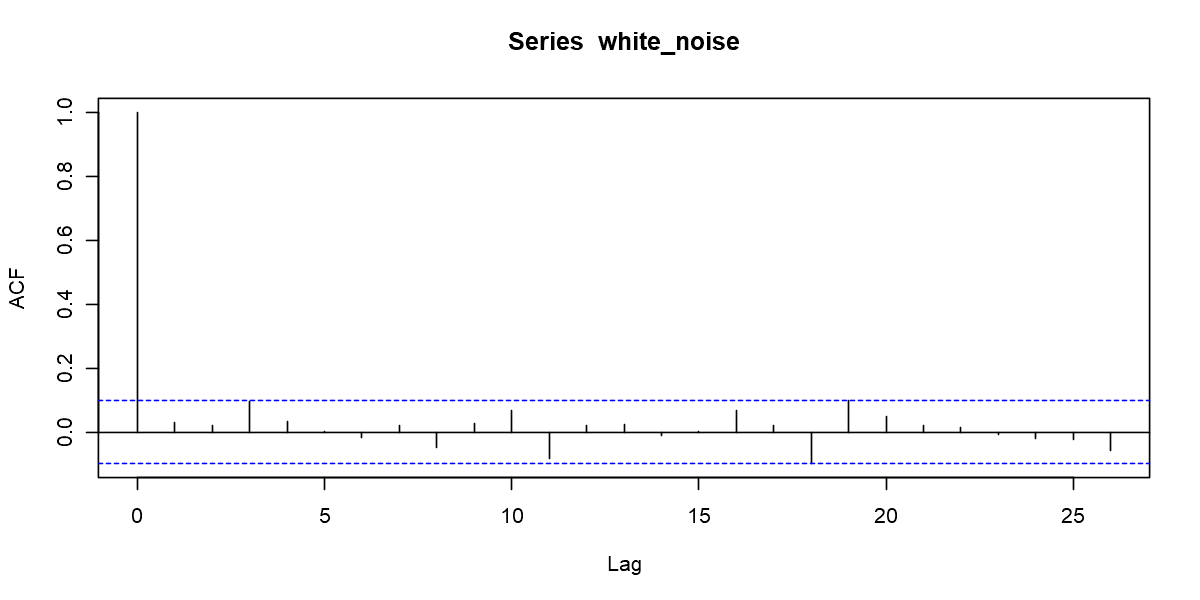

In [12]:
acf(white_noise)

## ランダムウォーク
データの変化がランダムである過程。ホワイトノイズのような乱数の累積和のようなもの。
ホワイトノイズの累積和を取ると簡単にランダムウォークが作れる。

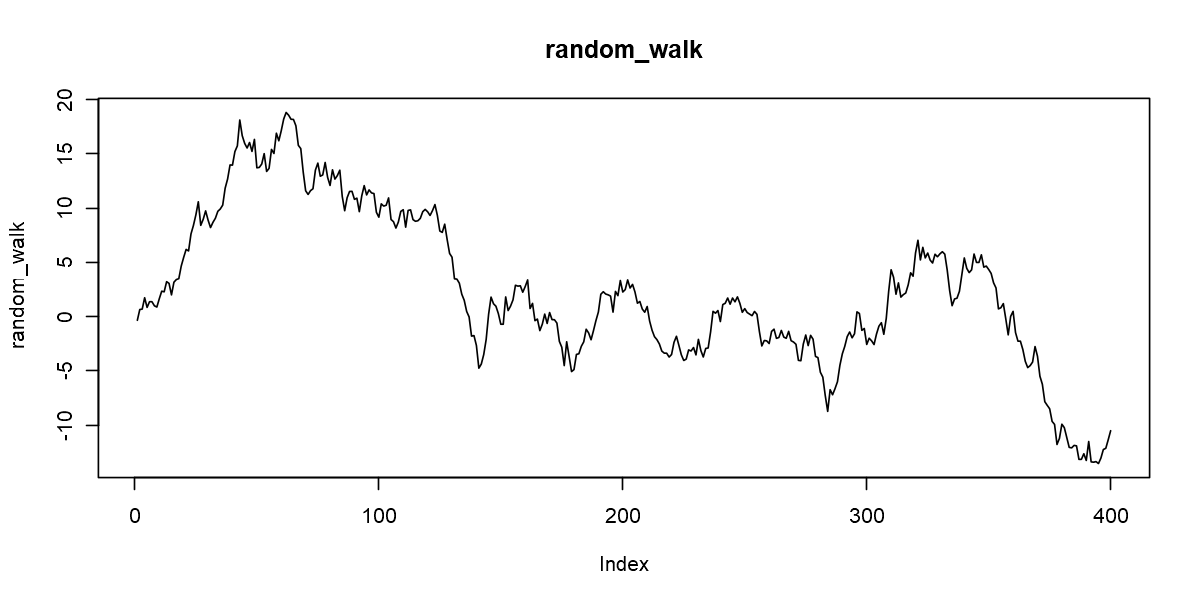

In [13]:
random_walk <- cumsum(white_noise)
plot(random_walk, type = 'l', main = 'random_walk')

## 時系列データの構造
時系列データは以下の要素に分解できる。

- 短期の自己相関
- 周期性変動
- トレンド
- 外因性
- ホワイトノイズ

## その他用語

|用語|<div style="text-align: left;">英語|<div style="text-align: left;">意味|
|----------------|-------------------------------|--------------------------|
|定常過程|<div style="text-align: left;">Stationary Process|<div style="text-align: left;">時系列の性質が変化しない過程|
|非定常過程|<div style="text-align: left;">Non-Stationary Process|<div style="text-align: left;">時系列の性質が変化する過程|
|ノイズ|<div style="text-align: left;">Noise|<div style="text-align: left;">他の成分で説明できないデータのばらつき、誤差|
|単位根検定|<div style="text-align: left;">Unit root test|<div style="text-align: left;">時系列データが定常過程であることの検定|
|差分|<div style="text-align: left;">Difference|<div style="text-align: left;">ある時点のデータとn個前のデータとの差、変化量|
|偏自己相関|<div style="text-align: left;">Partial autorecorrelation|<div style="text-align: left;">間のデータの影響を除去した自己相関|
|残差|<div style="text-align: left;">Redidual|<div style="text-align: left;">実データとモデルの推定値との差|

## Box-Jenkins法（時系列分析のフレームワーク）

|<div style="text-align: left;">ステップ|<div style="text-align: left;">内容|<div style="text-align: left;">ポイント|
|---|---|---|
|1|<div style="text-align: left;">データを分析しやすいように変換する（差分・対数・対数差分など）|<div style="text-align: left;">定常過程への変換|
|2|<div style="text-align: left;">データにARIMAモデルやそれに準ずつモデルを適用する|<div style="text-align: left;">・ARIMA,SARIMAなどの仕組み。<br>・モデル同定の手順|
|3|<div style="text-align: left;">推定されたモデルを評価する|<div style="text-align: left;">評価の方法（残差の自己相関、残差の正規性の検定）|
|4|<div style="text-align: left;">推定されたモデルを用いて予測する|<div style="text-align: left;">評価の方法（予測精度の評価）|

# Rにおける時系列データの取り扱い

## ts型
Rの標準パッケージに含まれる時系列データの方として`ts`型がある（time series）

In [14]:
# 例として、2000年1月から月単位のデータを36個生成してみる。
# 月単位のデータにしたい場合、freq = 12
ts_sample <- ts(1:36, start = c(2000, 1), frequency = 12)
ts_sample

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,1,2,3,4,5,6,7,8,9,10,11,12
2001,13,14,15,16,17,18,19,20,21,22,23,24
2002,25,26,27,28,29,30,31,32,33,34,35,36


In [15]:
# 四半期ごとに区切る場合freq = 4とする
ts_sample <- ts(1:24, start = c(2000, 1), frequency = 4)
ts_sample

,Qtr1,Qtr2,Qtr3,Qtr4
2000,1,2,3,4
2001,5,6,7,8
2002,9,10,11,12
2003,13,14,15,16
2004,17,18,19,20
2005,21,22,23,24


In [16]:
# window関数で特定の期間を抽出
window(ts_sample, start = c(2000, 3), end = c(2000, 10))    

,Qtr1,Qtr2,Qtr3,Qtr4
2000,,,3,4
2001,5,6,7,8
2002,9,10,,


## xts型
`ts`型の欠点として、日単位のデータに弱いという点がある。
Rにおいては、他にも`zoo`などの時系列データを扱う型があるが、それらを統合している型が`xts`型。
`xts`型のデータを作成する方法は複数あるが、行名として日付を指定したmatrix型データを引数に与えるのが簡単。

In [19]:
library(xts)

mat <- matrix(
  c(1:5),
  dimnames = list(
    as.character(seq(as.Date("2000-01-01"), as.Date("2000-01-05"), by = "day"))),
  ncol = 1
  )

xts_sample <- as.xts(mat)
xts_sample         

           [,1]
2000-01-01    1
2000-01-02    2
2000-01-03    3
2000-01-04    4
2000-01-05    5

In [20]:
# 日付を指定してデータ取得
xts_sample["2000-01-03"]

           [,1]
2000-01-03    3

In [21]:
# コロンで範囲指定も可
xts_sample["2000-01-03::"]

           [,1]
2000-01-03    3
2000-01-04    4
2000-01-05    5

In [22]:
xts_sample["2000-01-02::2000-01-04"]

           [,1]
2000-01-02    2
2000-01-03    3
2000-01-04    4

In [23]:
# 下記のようなdata.frameをxtsに変換する場合、read.zooを介すとよい
df <- data.frame(
  list(as.character(seq(as.Date("2000-01-01"), as.Date("2000-01-05"), by = "day"))),
  c(1:5)
)

df_xts <- as.xts(read.zoo(df))
df_xts

           [,1]
2000-01-01    1
2000-01-02    2
2000-01-03    3
2000-01-04    4
2000-01-05    5

## グラフ描画
R組み込み「EuStockMarkets」(Daily Closing Prices Of Major European Stock Indices, 1991--1998)のドイツの株価（DAX）を描画してみる。

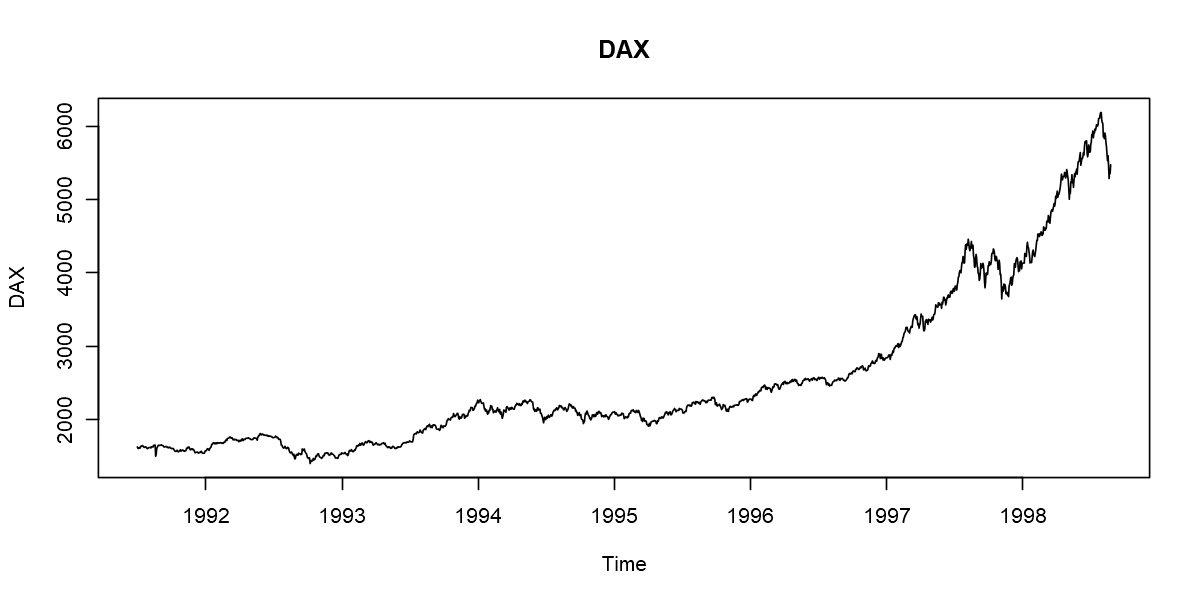

In [24]:
plot(EuStockMarkets[,'DAX'],
     ylab = 'DAX',
     main = 'DAX')

ggplot2とggfortifyパッケージ読み込みでよりきれいなグラフを描ける。

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



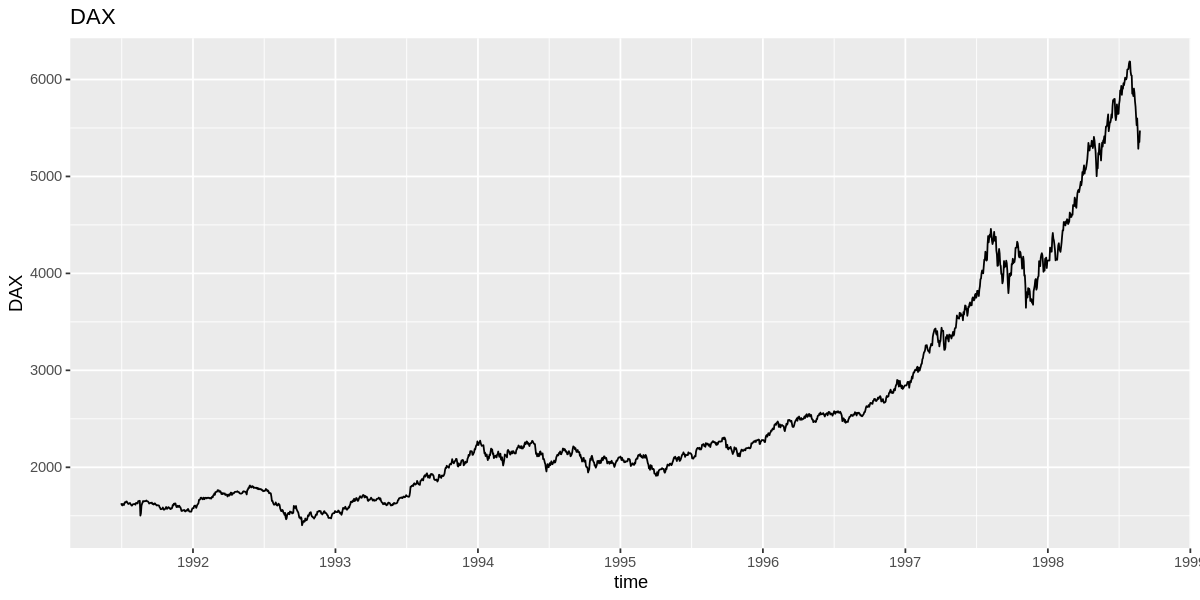

In [9]:
options(repr.plot.width=10, repr.plot.height=5)
library(ggplot2)
library(ggfortify)

autoplot(EuStockMarkets[,'DAX'],
         xlim = c(1991,1999), 
         xlab = 'time',
         ylab = 'DAX',
         main = 'DAX') + 
  scale_x_continuous(breaks = seq(1991,1999,1))

decompose関数を使うことで、時系列データをトレンド・季節成分・ノイズなどに分解できる。

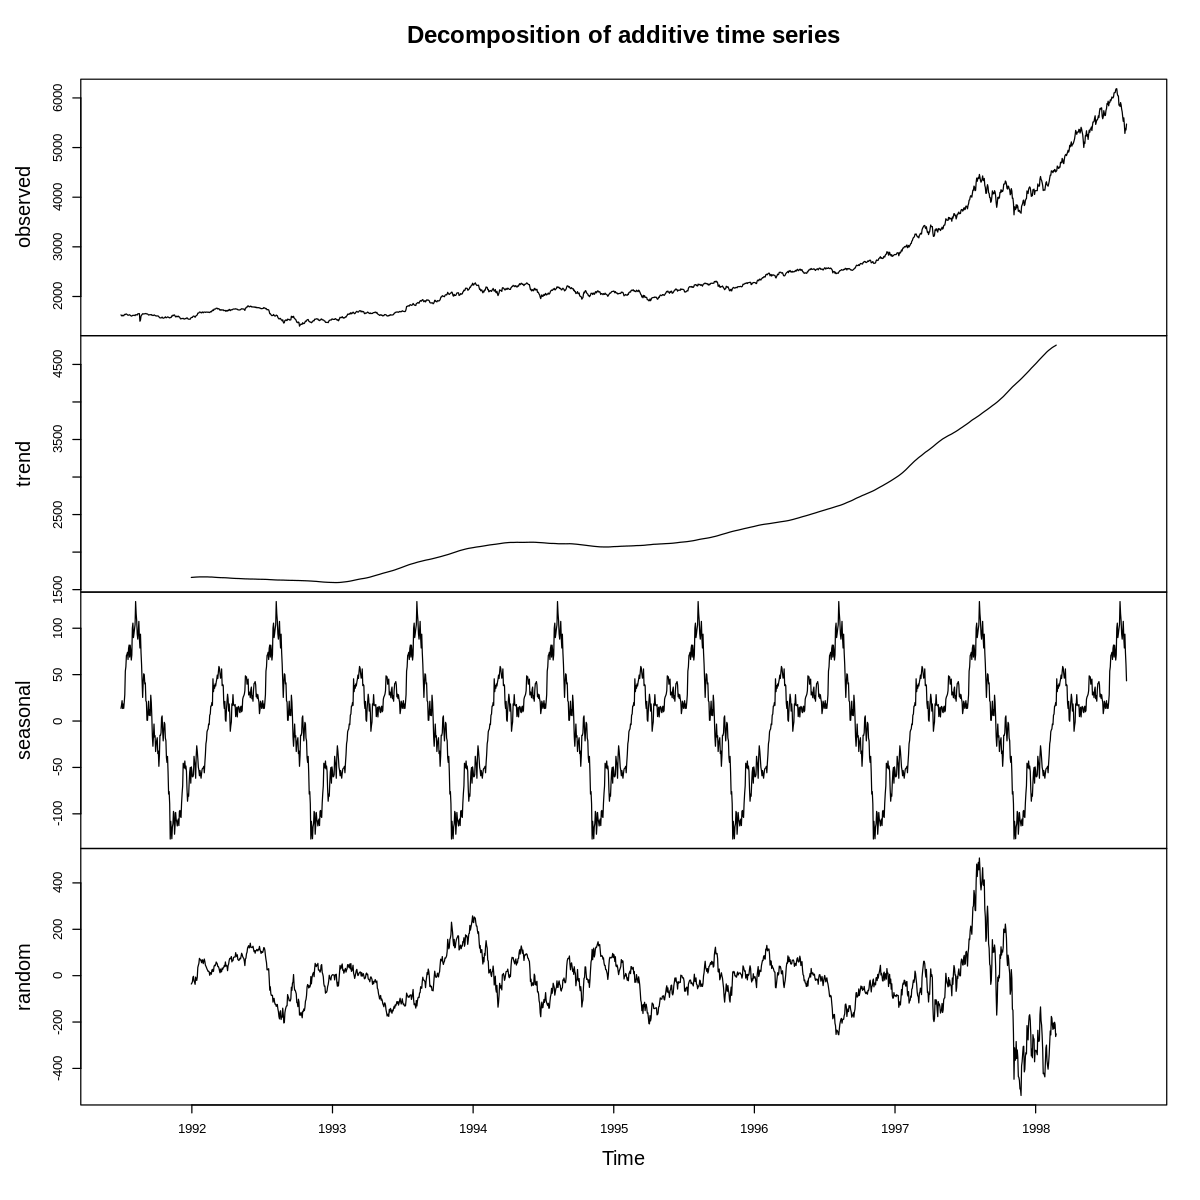

In [10]:
options(repr.plot.width=10, repr.plot.height=10)
decomp <- decompose(EuStockMarkets[,'DAX'])
plot(decomp)

forecastパッケージのggtsdisplay関数を使うと、データ系列と相関係数（ACF)、偏相関係数（PACF）のコレログラムを描くことができる。

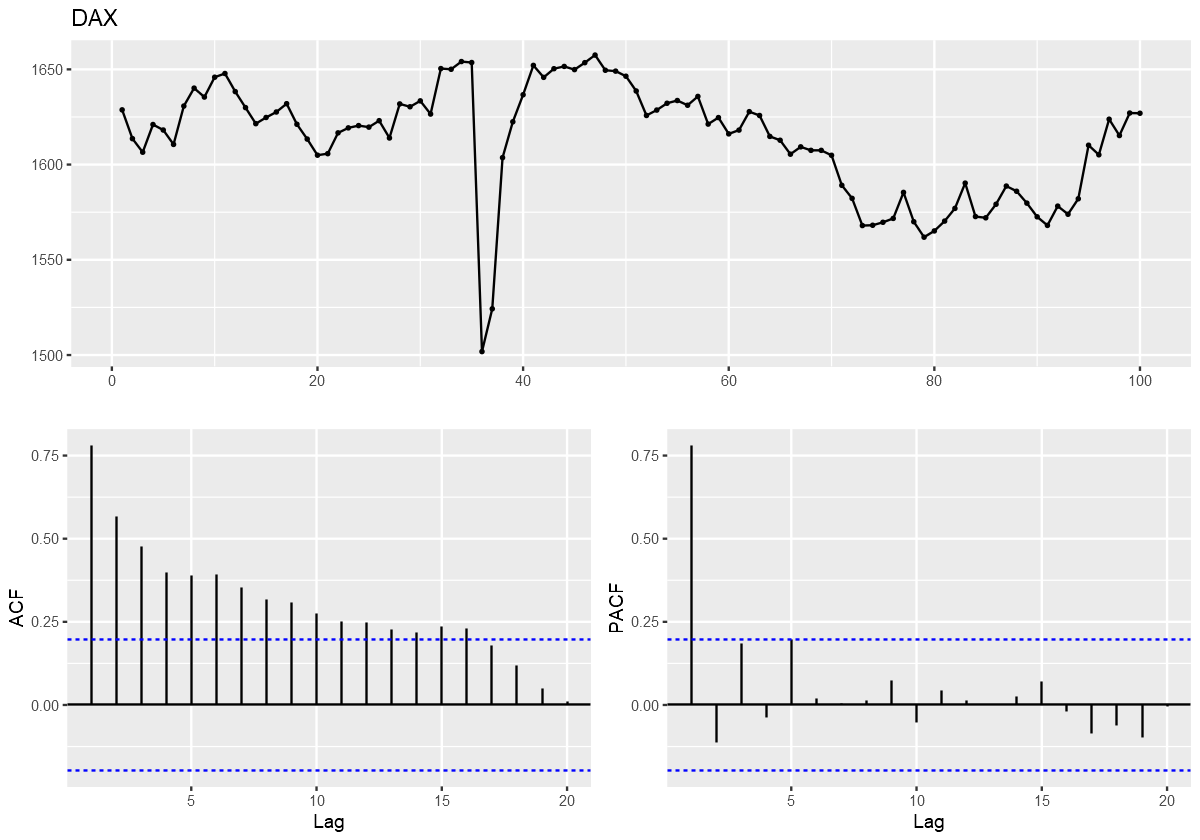

In [4]:
library(forecast)

options(repr.plot.width=10, repr.plot.height=7)

# 簡単のため先頭100日分のデータで表示
ggtsdisplay(EuStockMarkets[1:100,'DAX'], main = 'DAX')

左下の相関係数のグラフを見ると、長期にわたり自己相関が続いていることが分かる。
右下の偏自己相関では、およそ5日周期で大きな偏自己相関がみられる。

# 定常/非定常過程の判別：単位根検定
データの差分を取る必要があるかどうかを判別する方法に、単位根検定がある。<br>
原系列が非定常過程であり、差分系列が定常過程であるとき、その過程を単位根過程という。


|検定|帰無仮説|対立仮説|判断|
|---|---|---|---|
|ADF検定|単位根あり|単位根なし|危険率5%で有意となったら差分は取らないと判断|
|KPSS検定|単位根なし|単位根あり|危険率5%で有意となったら差分を取るべきと判断|

In [19]:
#ADF検定の例
library(tseries)
adf.test(EuStockMarkets[,'DAX'])
# p値0.9598となり、帰無仮説は棄却されない→単位根あり→差分を取るべき（非定常過程）


	Augmented Dickey-Fuller Test

data:  EuStockMarkets[, "DAX"]
Dickey-Fuller = -0.82073, Lag order = 12, p-value = 0.9598
alternative hypothesis: stationary


In [37]:
#　差分を取って再検証
adf.test(diff(EuStockMarkets[,'DAX']))
# p値0.01となり帰無仮説は棄却→単位根なし→差分は取らなくてよい（定常過程）


	Augmented Dickey-Fuller Test

data:  diff(EuStockMarkets[, "DAX"])
Dickey-Fuller = -9.9997, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


差分を取ったデータを図示してみる。

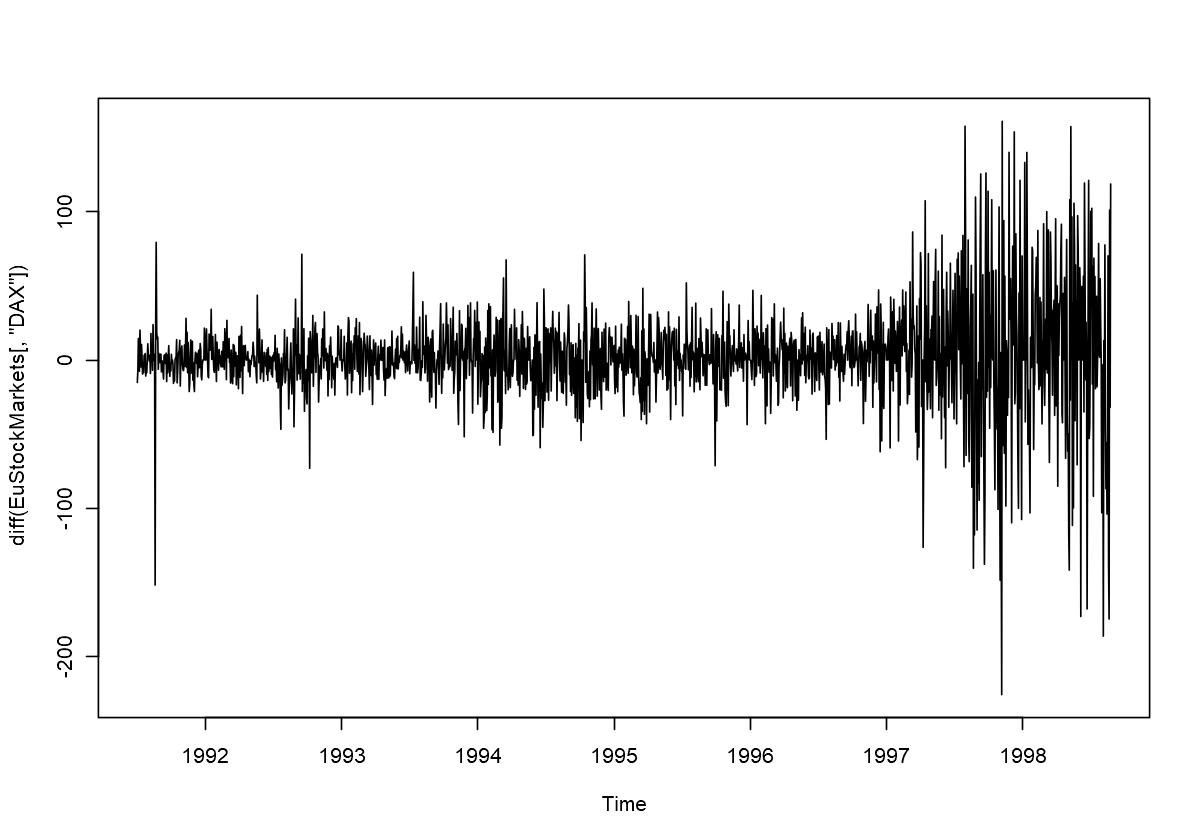

In [38]:
plot(diff(EuStockMarkets[,'DAX']))

In [18]:
#KPSS検定の例
library(urca)
summary(ur.kpss(EuStockMarkets[,'DAX']))
# 有意水準を5%としたときの棄却点が0.463であり、棄却点15.4007を上回っている。
# 単位根がないという帰無仮説が棄却されたので単位根があると見なす。（差分を取る必要がある、非定常過程）


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 15.4007 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [29]:
# ndiffs関数で何回差分を取るべきか判定することができる。
library(forecast)
ndiffs(EuStockMarkets[,'DAX'])

[1] 2

In [41]:
# 1階差分
summary(ur.kpss(diff(EuStockMarkets[,'DAX'])))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 0.7564 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [42]:
# 2階差分
summary(ur.kpss(diff(diff(EuStockMarkets[,'DAX']))))
# 確かに2回差分で、0.463を下回った。
# 単位根がないという帰無仮説がされないので単位根がないと見なす。（差分を取る必要がない、定常過程）


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 0.0112 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


## <補足>

|前処理の種類|使用シーン|
|---|---|
|対数変換|時系列データの分散が一定ではない時に行うことで、分散を一定と見なせる場合がある|
|差分|差分はデータのトレンドを除くために行う。トレンドが除去できない場合は、二階差分を行う場合もある。|
|対数差分|データの変動を明らかにしたい時に用いる。一つ前の値と次の値の比をとったものを対数変換しているので、変動を表す。<br>$ \Delta(log(y_{t})) = log(y_{t}) - log(y_{t-1}) =  log \dfrac{y_{t}}{y_{t-1}}$|

時系列モデルについて
手元の時系列データから未来のデータの傾向、変化を予測するために様々なモデルが提案されている。


|モデル|数式表現|特徴|
|----|-----|-----|
|AR(Autoregression)|AR(p)<br>$ y_{t} = \phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\dots\phi_{p}y_{t-p} + \epsilon_{t}$|・定常過程が対象<br>・p次前のデータで回帰<br>・過去の自分のデータを説明変数として回帰モデルを作成することで自己相関を表現|
|MA(Moving average)|MA(q)<br>$ y_{t} = \mu + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} \dots \theta_{q}\epsilon_{t-q} + \epsilon_{t}$|・定常過程が対象<br>・q次分の自己相関で予測<br>・過去と未来で共通の値を使用する事で自己相関を表現|
|ARMA(Autoregressive moving average)|ARMA(p,q)<br>$ y_{t} = \phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\dots\phi_{p}y_{t-p} +  \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} \dots \theta_{q}\epsilon_{t-q} +\epsilon_{t}$|・定常過程が対象<br>・ARとMAの両方のモデルを適用することで、自己相関をより柔軟に表現する|
|ARIMA(Autoregressive integrated moving average)|ARIMA(p,d,q)<br>$ y_{t} - y_{t-d} =c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \cdots + \phi_{p}y_{t-p} + \varepsilon_{t} + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} $<br>または<br>$ y_{t} - y_{t-d}=c + \varepsilon_{t} + \displaystyle \sum_{ i = 1 }^{ p } \phi_{i}y_{t-i} +\displaystyle \sum_{ i = 1 }^{ q } \theta_{i}\varepsilon_{t-i} $|・時系列データのd階差分系列、$y_{t}−y_{t−d}$をARMAモデルで表現するモデル<br>・非定常過程も対象<br>・ARMAに差分を取る操作を追加している<br>・d階和分過程I(d)においてARMA(p,q)を適用する|

# モデルの検証
## データセット
R組み込みのデータSeatbelts（イギリスの交通事故死傷者数のデータ）のfront（前席における死傷者数）を使用して予測してみる。

In [15]:
# データの確認
library(tidyverse)
library(tseries)
Seatbelts %>% head()

[1] 107  97 102  87 119 106

In [16]:
Seatbelts[,'front']

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1969,867,825,806,814,991,945,1004,1091,958,850,1109,1113
1970,925,903,1006,892,990,866,1095,1204,1029,1147,1171,1299
1971,944,874,840,893,1007,973,1097,1194,988,1077,1045,1115
1972,1005,857,879,887,1075,1121,1190,1058,939,1074,1089,1208
1973,903,916,787,1114,1014,1022,1114,1132,1111,1008,916,992
1974,731,665,724,744,910,883,900,1057,1076,919,920,953
1975,664,607,777,633,791,790,803,884,769,732,859,994
1976,704,684,671,643,771,644,828,748,767,825,810,986
1977,714,567,616,678,742,840,888,852,774,831,889,1046
1978,889,626,808,746,754,865,980,959,856,798,942,1010


In [17]:
ggtsdisplay(Seatbelts[,'front'],main='front')

ERROR: Error in ggtsdisplay(Seatbelts[, "front"], main = "front"): could not find function "ggtsdisplay"


12か月周期で自己相関が大きくなっており、偏自己相関も12か月単位で大きな偏自己相関がみられる。
1年単位での相関が目立つため、季節成分があることは確かなので、ggsubseriesplot関数を用いて月ごとのグラフを描いてみる。

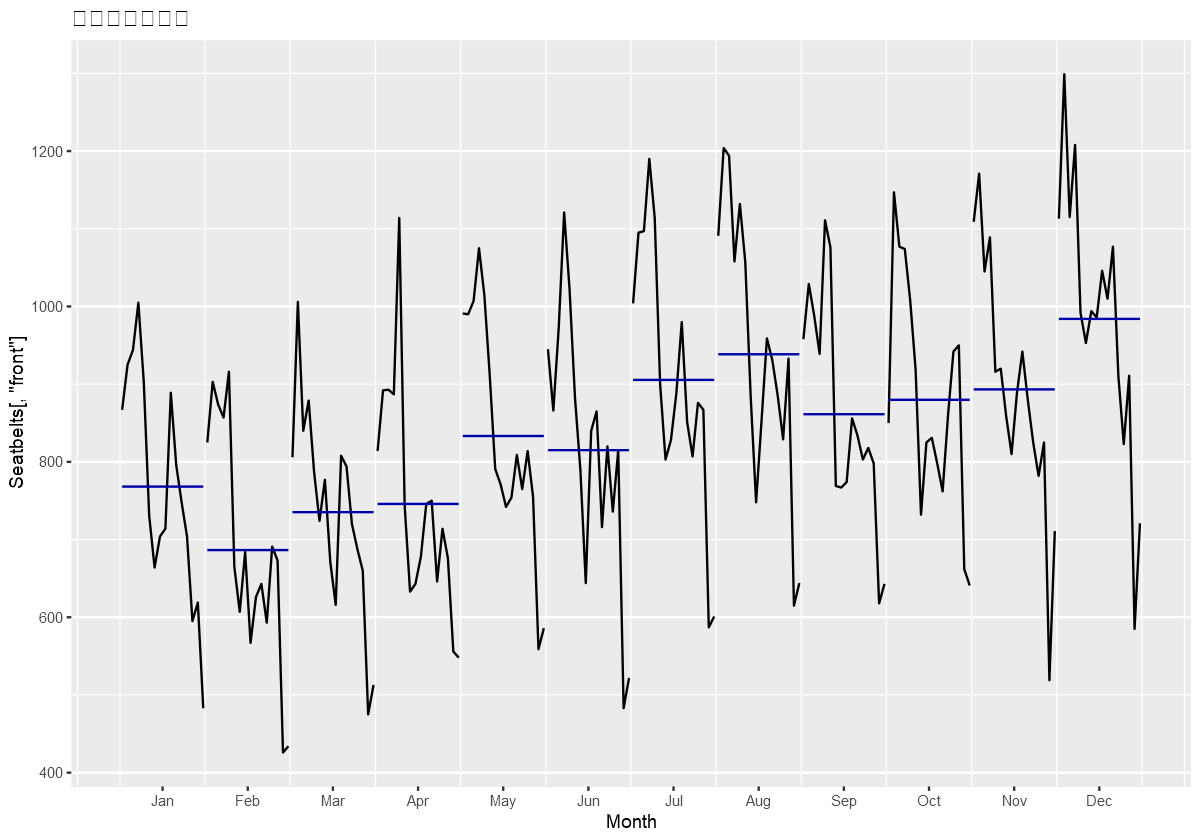

In [5]:
ggsubseriesplot(Seatbelts[,'front'],main='月毎の死傷者数')

### ARモデル
過去p点分のデータ予測に使用するモデルがARモデル。

In [23]:
library(forecast)
    
front_diff <- diff(Seatbelts[,'front'], lag = 12)# 1階差分データを用いる（12か月の季節差分）

ndiffs(front_diff)# 定常過程かどうかの検証、何回差分を取るか

[1] 0

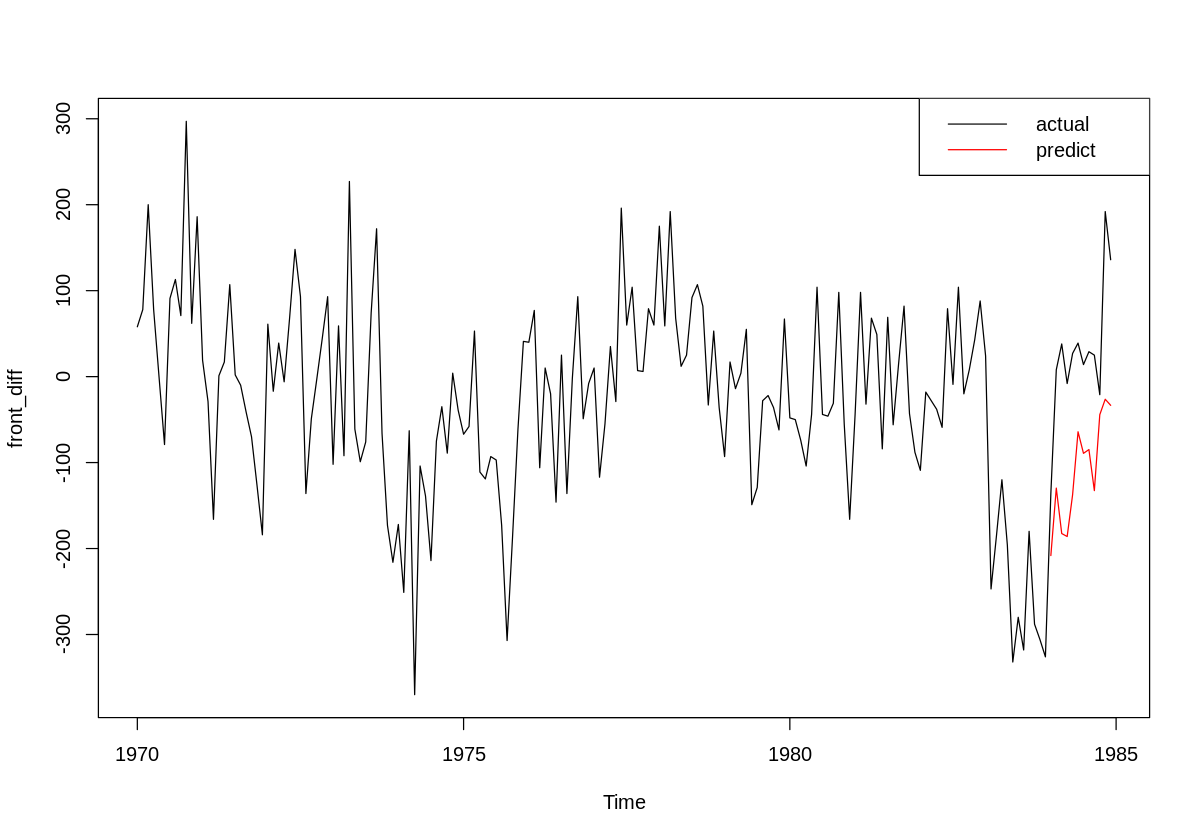

In [25]:

options(repr.plot.width=10, repr.plot.height=7)

front_diff_train <- window(front_diff, start = c(1970, 1), end = c(1983,12))# trainデータの抽出
result <- ar(front_diff_train, method = 'ols')# ols（最小二乗法）でARモデル作成
result_pr <- predict(result, front_diff_train, n.ahead = 12)# モデルをもとに先12か月分を予測
result_pred <- ts(result_pr$pred, start = c(1984, 1), frequency = 12)

plot(front_diff)
lines(result_pred, col="red")
legend("topright", legend = c('actual','predict'),lty=c(1,1),col=c(rgb(0,0,0),rgb(1,0,0)))

### MAモデル
q次分のデータの自己相関からモデルを構築。

In [29]:
front_diff_train 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1970,58,78,200,78,-1,-79,91,113,71,297,62,186
1971,19,-29,-166,1,17,107,2,-10,-41,-70,-126,-184
1972,61,-17,39,-6,68,148,93,-136,-49,-3,44,93
1973,-102,59,-92,227,-61,-99,-76,74,172,-66,-173,-216
1974,-172,-251,-63,-370,-104,-139,-214,-75,-35,-89,4,-39
1975,-67,-58,53,-111,-119,-93,-97,-173,-307,-187,-61,41
1976,40,77,-106,10,-20,-146,25,-136,-2,93,-49,-8
1977,10,-117,-55,35,-29,196,60,104,7,6,79,60
1978,175,59,192,68,12,25,92,107,82,-33,53,-36
1979,-93,17,-14,4,55,-149,-129,-28,-22,-36,-62,67


In [40]:
result <- Arima(front_diff_train, order = c(0, 0, 1)) 
result_pred <- ts(forecast(result, h = 12)$mean,c(1984, 1), frequency = 12)

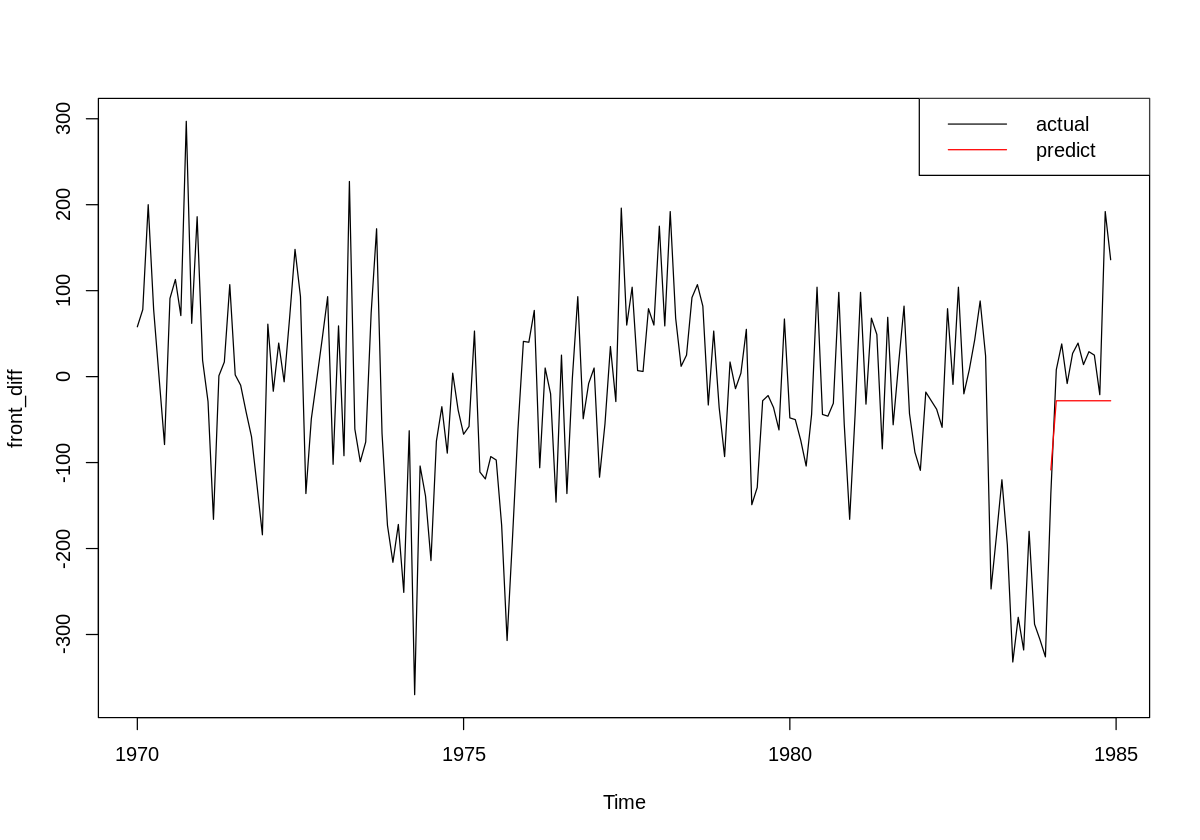

In [41]:
plot(front_diff)
lines(result_pred, col="red")
legend("topright", legend = c('actual','predict'),lty=c(1,1),col=c(rgb(0,0,0),rgb(1,0,0)))

### ARIMAモデル
データの和分（差分）にARモデルとMAモデルを統合して適用するモデル。
※ARIMAモデルは内部で勝手に差分を取るため、差分系列は使用しない

In [43]:
#最後の1年をテストデータ、それより前を訓練データ
Seatbelts_set <- Seatbelts[,c('front', 'PetrolPrice', 'law')]
train <- window(Seatbelts, end=c(1983,12))
test <- window(Seatbelts, start=c(1984,1))

#説明変数の取り出し
oth <- train[,c('PetrolPrice', 'law')]

#モデル作成
model_sarimax <- Arima(y = train[, 'front'], # 目的変数
                       order = c(1, 1, 1), # SARIMA(p,d,q)(P,D,Q)における(p,d,q)
                       seasonal = c(1, 0, 0), # 季節成分(P,D,Q)
                       xreg = oth) # 説明変数

In [44]:
model_sarimax

Series: train[, "front"] 
Regression with ARIMA(1,1,1)(1,0,0)[12] errors 

Coefficients:
         ar1      ma1    sar1  PetrolPrice        law
      0.2837  -0.9453  0.6634   -2805.0083  -243.6760
s.e.  0.0832   0.0325  0.0554     863.4419    41.9162

sigma^2 estimated as 6725:  log likelihood=-1044.18
AIC=2100.37   AICc=2100.86   BIC=2119.49

In [45]:
# 両説明変数の係数が負→石油価格が上がったり、法が施行されると事故死傷者が減ると解釈する。

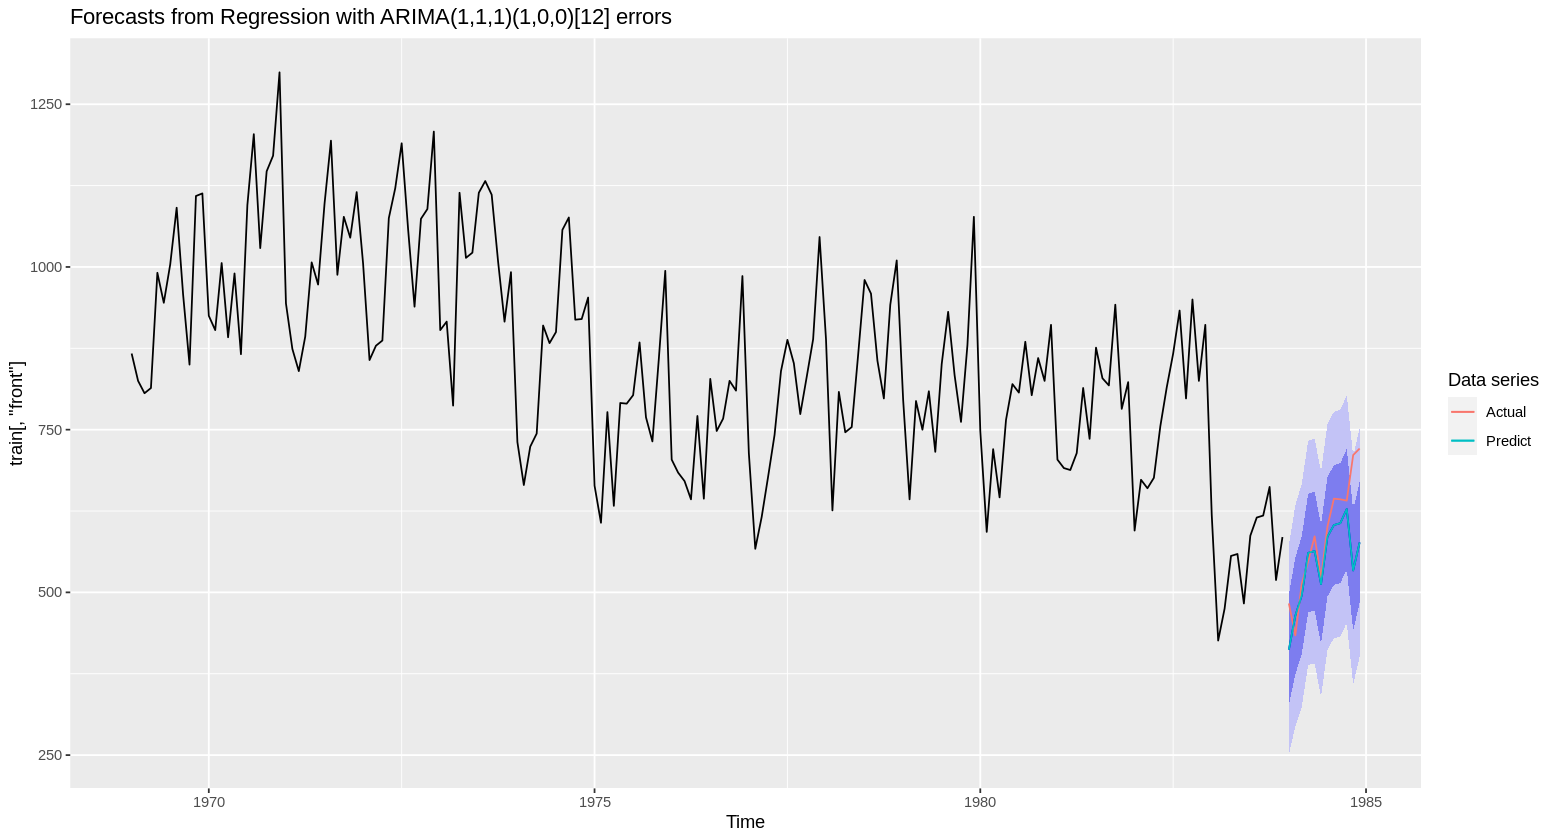

In [47]:
# 作成したモデルをもとに予測

options(repr.plot.width=13, repr.plot.height=7)

sarimax_f <- forecast(model_sarimax,
                      xreg = test[,c('PetrolPrice', 'law')],
                      h = 12, # 何時点先まで予測するか(ここでは12か月=1年)
                      level = c(95, 70)) # 信頼区間の表示

# 描画
autoplot(sarimax_f,series='Forecast') + 
  autolayer(test[, 'front'], series = 'Actual') + 
  autolayer(sarimax_f$mean, series = 'Predict') +
  guides(colour=guide_legend(title="Data series"))

In [ ]:
##モデルの同定

###次数の決定
適切なモデルの選定のためにモデルの次数を決定する。

```r
# 自動モデル選択関数のauto.arimaを用いる
model_sarimax_auto <- auto.arima(y = train[, 'front'],
                                 xreg = oth, # 説明変数
                                 ic = "aic", # AICを使ってモデル選択
                                 max.order = 7, # SARIMA(p,d,q)(P,D,Q)におけるmax(p+q+P+Q)。これを増やすほど複雑なモデルを候補に入れてモデル選択できる。
                                 stepwise = F, # Tにすると候補となる次数の組み合わせが減る
                                 approximation = F, # Tにすると毎回の計算で近似的な手法を使うことで計算速度を上げる。
                                 parallel = T, # 並列計算の指定
                                 num.cores = 4) # 4コア

> model_sarimax_auto
Series: train[, "front"] 
Regression with ARIMA(2,0,0)(0,1,1)[12] errors 

Coefficients:
         ar1     ar2     sma1    drift  PetrolPrice        law
      0.3561  0.1938  -0.8621  -1.4226   -3084.3851  -163.1541
s.e.  0.0763  0.0759   0.1279   0.3035     964.8893    45.7199

sigma^2 estimated as 5700:  log likelihood=-970.01
AIC=1954.01   AICc=1954.71   BIC=1975.88

```

### 残差（予測値－実測値）のチェック
モデルが「良い」モデルかどうかは、残差（予測値－実測値）がきれいにばらついているかどうかを確かめることによって、ある程度判断できる。
予測値の方が実測値よりも常に大きいなどの系統的な誤差があれば失敗。また、残差に自己相関があれば、これはこれでうまくモデリングできていないことになる。誤差はあくまでも、誤差らしくあるような状態が理想。
残差の自己相関の検定には、`forecast::checkresiduals`関数を使う。

```r
> checkresiduals(model_sarimax_auto)

	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,0,0)(0,1,1)[12] errors
Q* = 37.794, df = 18, p-value = 0.004124

Model df: 6.   Total lags used: 24
```
p<0.05のため、有意な自己相関がみられるという結果になり、あまりうまくモデリングできていないと解釈する。図示の結果を見てみると、突出した自己相関がところどころ見受けられる。

<a href="https://imgur.com/FEfqLdM"><img src="https://i.imgur.com/FEfqLdM.png" title="source: imgur.com" /></a>

残差の正規性の検定も行う。`tseries::jarque.bera.test`関数を使う。残差は`resid`関数を使えば取得できる。

```r
> jarque.bera.test(resid(model_sarimax_auto))

	Jarque Bera Test

data:  resid(model_sarimax_auto)
X-squared = 5.9597, df = 2, p-value = 0.0508
```
こちらはp>0.05となっており、正規分布と有意に異なっているとは言えない結果。
一方で、残差の自己相関に関しては検定をパスしなかったため、モデルの同定手順としては、再度定常過程への変換等を行いモデリングを行う必要がある。
上記検証では、一階差分を取っただけのデータを使用していますが、事前に対数変換を行ったデータで再検証すると以下のようになる。

```r
# 事前に対数変換
Seatbelts_log <- Seatbelts[,c('front', 'PetrolPrice', 'law')]
Seatbelts_log[,'front'] <- log(Seatbelts[,'front'])
Seatbelts_log[,'PetrolPrice'] <- log(Seatbelts[,'PetrolPrice'])

train <- window(Seatbelts_log, end=c(1983,12))
test <- window(Seatbelts_log, start=c(1984,1))

petro_law <- train[,c('PetrolPrice', 'law')]

# auto.arimaによるモデル自動選択
model_sarimax_auto <- auto.arima(y = train[, 'front'],
                                 xreg = petro_law,
                                 ic = "aic",
                                 max.order = 7,
                                 stepwise = F,
                                 approximation = F,
                                 parallel = T,
                                 num.cores = 4)

```
```r
# 残差の自己相関検定
> checkresiduals(model_sarimax_auto)

	Ljung-Box test

data:  Residuals from Regression with ARIMA(2,0,1)(0,1,1)[12] errors
Q* = 20.99, df = 18, p-value = 0.2799

Model df: 6.   Total lags used: 24

# 残差の正規性の検定
> jarque.bera.test(resid(model_sarimax_auto))

	Jarque Bera Test

data:  resid(model_sarimax_auto)
X-squared = 0.39938, df = 2, p-value = 0.819
```
<a href="https://imgur.com/IcBeun6"><img src="https://i.imgur.com/IcBeun6.png" title="source: imgur.com" /></a>

いずれもp>0.05となり、残差に有意な自己相関は見られず、正規性についても有意に異なっているとは言えない結果となった。明らかな問題はないモデルであることが確認できた。
※ただし、今回のモデルでは、説明変数に石油価格（PetrolPrice）を用いてモデルを作成しているが、これは将来の石油価格が分かっている前提のモデルとなってしまっているため、実際は何らかの値で代用してやる必要がある。

#### 予測

```r
# 作成したモデルをもとに予測
sarimax_f <- forecast(model_sarimax_auto,
                      xreg = test[,c('PetrolPrice', 'law')],
                      h = 12, # 何時点先まで予測するか(ここでは12か月=1年)
                      level = c(95, 70)) # 信頼区間の表示

# 描画
autoplot(sarimax_f,series='Forecast') + 
  autolayer(test[, 'front'], series = 'Actual') + 
  autolayer(sarimax_f$mean, series = 'Predict') +
  guides(colour=guide_legend(title="Data series"))
```

<a href="https://imgur.com/d8nXWIR"><img src="https://i.imgur.com/d8nXWIR.png" title="source: imgur.com" /></a>

#### 予測精度の評価
予測精度の評価

```r
sarimax_rmse <- sqrt(sum((sarimax_f$mean - test[,'front'])^2) / length(sarimax_f$mean))
> sarimax_rmse
[1] 0.09674572

# accuracy関数を使うとより簡便
> accuracy(sarimax_f, x = test[, 'front'])
                       ME       RMSE        MAE         MPE      MAPE      MASE         ACF1 Theil's U
Training set -0.004353509 0.08283297 0.06430968 -0.07784816 0.9593004 0.5848660 -0.004032101        NA
Test set      0.071495376 0.09674572 0.07537019  1.10793155 1.1703728 0.6854562  0.337639488   1.03686
```

##　参考
- [時系列分析と状態空間モデルの基礎: RとStanで学ぶ理論と実装](https://www.amazon.co.jp/%E6%99%82%E7%B3%BB%E5%88%97%E5%88%86%E6%9E%90%E3%81%A8%E7%8A%B6%E6%85%8B%E7%A9%BA%E9%96%93%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E5%9F%BA%E7%A4%8E-R%E3%81%A8Stan%E3%81%A7%E5%AD%A6%E3%81%B6%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%A3%85-%E9%A6%AC%E5%A0%B4-%E7%9C%9F%E5%93%89/dp/4903814874/ref=asc_df_4903814874/?tag=jpgo-22&linkCode=df0&hvadid=280447864923&hvpos=&hvnetw=g&hvrand=15727691578683649605&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1009306&hvtargid=pla-526539977177&psc=1&th=1&psc=1)
- [Udemy：R言語によるデータ分析応用編]()
- [じっくり学ぶ時系列解析~基礎編~](https://www.medi-08-data-06.work/entry/time_serise_basic)
- [時系列分析_実践編](https://logics-of-blue.com/%E6%99%82%E7%B3%BB%E5%88%97%E5%88%86%E6%9E%90_%E5%AE%9F%E8%B7%B5%E7%B7%A8/)